# UNIVERSIDA NACIONAL ROSARIO CASTELLANOS
## SEDE: CASCO DE SANTO TOMÁS
### CIENCIA DE DATOS PARA NEGOCIOS
### MINERÍA DE DATOS
#####  Laboratorio 2. Exploración de Datamart de ventas
* Grupo: 502
* Alumno: Daniel Cureño Martínez

## Objetivo General
El propósito de esta práctica es que los estudiantes comprendan cómo se estructura un datamart orientado a ventas, identifiquen sus componentes clave y desarrollen habilidades para realizar consultas que integren datos desde múltiples dimensiones. Esta actividad les permitirá visualizar cómo se modelan los datos en entornos reales de análisis empresarial.

## Descripción de la Actividad
Los alumnos deberán:
1. Importar un datamart de ventas en su entorno de trabajo.
2. Verificar la estructura del modelo: identificar la tabla de hechos (*Sales*) y las tablas de dimensiones (*Product, Customer, Time, Location*).
3. Analizar el diseño relacional: comprender cómo se conectan las dimensiones con la tabla de hechos mediante claves primarias y foráneas.
4. Ejecutar consultas exploratorias que les permitan responder preguntas de negocio, como patrones de compra, segmentación de clientes, comportamiento por regiones o estacionalidad.


**Pregunta de negocio:**  
¿Cuál es la región que genera el mayor volumen total de ventas?

In [6]:
from sqlalchemy import create_engine
import pandas as pd
import os

# Crear la carpeta resultados si no existe
os.makedirs('resultados', exist_ok=True)

# Cambia los datos de usuario, contraseña y base de datos
usuario = 'root'
password = 'dcm3164'
host = 'localhost'
db = 'datamart_salesdb'

# Crear el engine de SQLAlchemy
engine = create_engine(f"mysql+mysqlconnector://{usuario}:{password}@{host}/{db}")

# Consulta SQL
query = """
SELECT location.REGION_ID,
   sum(sales.SALES_TOTAL) AS TOTAL_VENTAS
FROM location JOIN sales 
ON (location.LOC_ID = sales.LOCATION_LOC_ID)       
GROUP BY REGION_ID
HAVING SUM(sales.SALES_TOTAL)=(
  SELECT MAX(TOTAL_VENTAS) FROM(
    SELECT sum(sales.SALES_TOTAL) AS TOTAL_VENTAS
    FROM location JOIN sales 
    ON (location.LOC_ID = sales.LOCATION_LOC_ID)       
    GROUP BY REGION_ID ) as suma_ventas );
"""

# Ejecutar consulta y guardar resultado en DataFrame
df = pd.read_sql(query, engine)

# Guardar resultado en CSV
df.to_csv('resultados/region_con_mas_ventas.csv', index=False)

# Mostrar resultado
df


,REGION_ID,TOTAL_VENTAS
0,2,6669024.0


**Pregunta de negocio:**  
¿Cuál es el total de ventas agrupado por cada región?



In [7]:
# Consulta SQL para total de ventas por región
query2 = """
SELECT REGION_ID, SUM(sales.SALES_TOTAL) AS TOTAL_VENTAS
FROM location JOIN sales 
ON (location.LOC_ID = sales.LOCATION_LOC_ID)       
GROUP BY REGION_ID;
"""

# Ejecutar consulta y guardar resultado en DataFrame
df2 = pd.read_sql(query2, engine)

# Guardar resultado en CSV
df2.to_csv('resultados/total_ventas_por_region.csv', index=False)

# Mostrar resultado
df2


,REGION_ID,TOTAL_VENTAS
0,2,6669024.0
1,1,6593838.0
2,5,6297107.0
3,3,6569030.0
4,4,6650260.0


**Pregunta de negocio:**  
¿Cómo se comportan las ventas por tipo de producto y ubicación (región)?



In [8]:
# Consulta SQL para volumen de venta por región y tipo de producto
query3 = """
SELECT REGION, product_type, volumen_venta
FROM  ( SELECT  l.REGION_ID AS REGION,
p.PRODUCT_TYPE_ID AS product_type,
        sum(s.SALES_QUANTITY) as volumen_venta
FROM (sales s JOIN product p
ON(s.PRODUCT_PRODUCT_ID = PRODUCT_ID))
 JOIN location l 
ON (s.LOCATION_LOC_ID = l.LOC_ID)
GROUP BY  REGION_ID, PRODUCT_TYPE_ID) AS MAX_VENTAS
GROUP BY REGION, product_type
ORDER BY 1;
"""

# Ejecutar consulta y guardar resultado en DataFrame
df3 = pd.read_sql(query3, engine)

# Guardar resultado en CSV
df3.to_csv('resultados/volumen_venta_region_producto.csv', index=False)

# Mostrar resultado
df3


,REGION,product_type,volumen_venta
0,1,101,26362.0
1,1,102,25437.0
2,1,103,25573.0
3,1,104,26900.0
4,1,105,24971.0
5,2,101,27081.0
6,2,102,28259.0
7,2,103,27110.0
8,2,104,24481.0
9,2,105,26814.0


**Pregunta de negocio:**  
¿Cómo varía el volumen total de ventas por año?


In [9]:
# Consulta SQL para volumen de ventas por año
query4 = """
SELECT time.TIME_YEAR,
   SUM(sales.SALES_QUANTITY) AS volumen
FROM  sales JOIN time
 ON (sales.TIME_TIME_ID = time.TIME_ID) 
GROUP BY TIME_YEAR;
"""

# Ejecutar consulta y guardar resultado en DataFrame
df4 = pd.read_sql(query4, engine)

# Guardar resultado en CSV
df4.to_csv('resultados/volumen_ventas_por_anio.csv', index=False)

# Mostrar resultado
df4


,TIME_YEAR,volumen
0,2024,112888.0
1,2023,112951.0
2,2021,108442.0
3,2025,86787.0
4,2022,111955.0
5,2020,111259.0


**Pregunta de negocio:**  
¿Cuáles son las 3 regiones que generan el mayor volumen total de ventas?



In [10]:
# Consulta SQL para top 3 regiones con más ventas
query5 = """
SELECT location.REGION_ID,
   sum(sales.SALES_TOTAL) AS TOTAL_VENTAS
FROM location JOIN sales 
ON (location.LOC_ID = sales.LOCATION_LOC_ID)       
GROUP BY REGION_ID
ORDER BY 2 DESC
LIMIT 3;
"""

# Ejecutar consulta y guardar resultado en DataFrame
df5 = pd.read_sql(query5, engine)

# Guardar resultado en CSV
df5.to_csv('resultados/top_3_regiones_ventas.csv', index=False)

# Mostrar resultado
df5


,REGION_ID,TOTAL_VENTAS
0,2,6669024.0
1,4,6650260.0
2,1,6593838.0


**Propósito:**  
Verificar la existencia de la base de datos, las tablas principales y conocer el volumen de registros en cada una, asegurando la integridad y el correcto montaje del datamart.



In [11]:
# Mostrar bases de datos disponibles
dbs = pd.read_sql("SHOW DATABASES;", engine)
display(dbs)


# Mostrar tablas en la base de datos
tables = pd.read_sql("SHOW TABLES;", engine)
display(tables)

# Contar registros en cada tabla principal
tablas = ['sales', 'time', 'customer', 'location', 'product']
for tabla in tablas:
    query = f"SELECT COUNT(*) AS total FROM datamart_salesdb.{tabla};"
    df = pd.read_sql(query, engine)
    print(f"Total de registros en {tabla}: {df.iloc[0,0]}")


,Database
0,datamart_salesdb
1,information_schema
2,mysql
3,performance_schema
4,sakila
5,sys
6,ventas_datamartdb
7,world


,Tables_in_datamart_salesdb
0,customer
1,location
2,product
3,sales
4,time


Total de registros en sales: 12882
Total de registros en time: 22501
Total de registros en customer: 12098
Total de registros en location: 214641
Total de registros en product: 200158


## Conclusión

La exploración del datamart de ventas permitió validar paso a paso la importancia de la correcta estructura y llenado de tablas dimensiones antes de procesar datos transaccionales. Al cargar adecuadamente la tabla de hechos, se observaron patrones y diferencias importantes en los volúmenes de ventas por región, por año y por tipo de producto. El uso de SQL y pandas facilitó el análisis automatizado y la exportación de resultados en formatos reutilizables, lo que demuestra cómo los datamarts optimizan la toma de decisiones y el análisis táctico en entornos empresariales. En este laboratorio, la metodología demostró su robustez al identificar y solucionar problemas de integridad referencial, permitiendo que los reportes sean confiables y útiles para el área de ventas y gestión comercial.


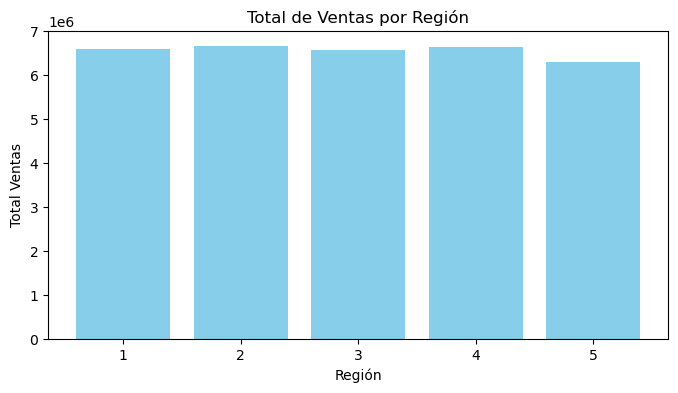

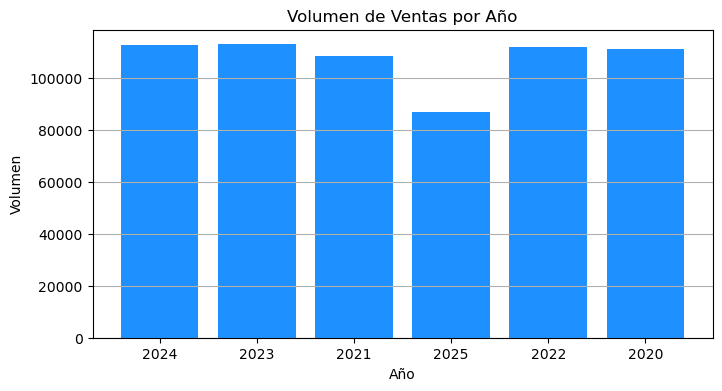

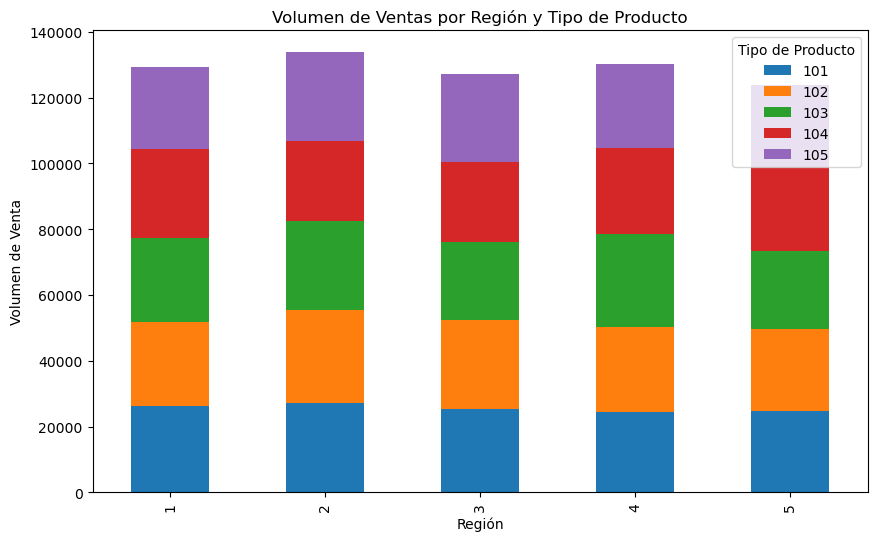

In [15]:
import matplotlib.pyplot as plt

# Resultados: df2 = ventas por región
plt.figure(figsize=(8,4))
plt.bar(df2["REGION_ID"], df2["TOTAL_VENTAS"], color='skyblue')
plt.title("Total de Ventas por Región")
plt.xlabel("Región")
plt.ylabel("Total Ventas")
plt.show()


# Gráfico de barras del volumen de ventas por año
plt.figure(figsize=(8,4))
plt.bar(df4["TIME_YEAR"].astype(str), df4["volumen"], color='dodgerblue')
plt.title("Volumen de Ventas por Año")
plt.xlabel("Año")
plt.ylabel("Volumen")
plt.grid(axis='y')
plt.show()


# Resultados: df3 = volumen de ventas por región y tipo de producto
pivot = df3.pivot(index='REGION', columns='product_type', values='volumen_venta')
pivot.plot(kind='bar', figsize=(10,6), stacked=True)
plt.title("Volumen de Ventas por Región y Tipo de Producto")
plt.xlabel("Región")
plt.ylabel("Volumen de Venta")
plt.legend(title='Tipo de Producto')
plt.show()
